In [1]:
import re

import requests
from bs4 import BeautifulSoup

# 1. URL 구조를 파악해보자!

URL 형태 : 은행 인공지능 키워드로 네이버 뉴스 1번째 페이지 기사 10개 

* https://search.naver.com/search.naver?&where=news&query=은행%20인공지능&start=1&refresh_start=0

URL을 필요한 부분만 남기고 조립해보면 : key1, key2, page -> key 사이는 %20으로 연결
*  'https://search.naver.com/search.naver?&where=news&query='+key1+'%20'+key2+'&start='+page+'&refresh_start=0'

In [2]:
key1 = '은행'
key2 = '인공지능'
page = [ i for i in range(1, 102, 10)]

In [3]:
list_naver_news = [ ]
for p in page :
  url_news = 'https://search.naver.com/search.naver?&where=news&query='+key1+'%20'+key2+'&start='+str(p)+'&refresh_start=0'
  list_naver_news.append(url_news)

list_naver_news

['https://search.naver.com/search.naver?&where=news&query=은행%20인공지능&start=1&refresh_start=0',
 'https://search.naver.com/search.naver?&where=news&query=은행%20인공지능&start=11&refresh_start=0',
 'https://search.naver.com/search.naver?&where=news&query=은행%20인공지능&start=21&refresh_start=0',
 'https://search.naver.com/search.naver?&where=news&query=은행%20인공지능&start=31&refresh_start=0',
 'https://search.naver.com/search.naver?&where=news&query=은행%20인공지능&start=41&refresh_start=0',
 'https://search.naver.com/search.naver?&where=news&query=은행%20인공지능&start=51&refresh_start=0',
 'https://search.naver.com/search.naver?&where=news&query=은행%20인공지능&start=61&refresh_start=0',
 'https://search.naver.com/search.naver?&where=news&query=은행%20인공지능&start=71&refresh_start=0',
 'https://search.naver.com/search.naver?&where=news&query=은행%20인공지능&start=81&refresh_start=0',
 'https://search.naver.com/search.naver?&where=news&query=은행%20인공지능&start=91&refresh_start=0',
 'https://search.naver.com/search.naver?&where=news

# 2. 크롤링 연습

### 페이지에서 개발자 도구로 원하는 제목이 있는 부분을 찾아보자!
* div 태그 중 attribute를 보면 news_area 클래스안에 링크와 제목이 들어가 있음
* 오늘은 beautifulsoup에서 태그에 클래스를 선택하는 find_all과 select 실습

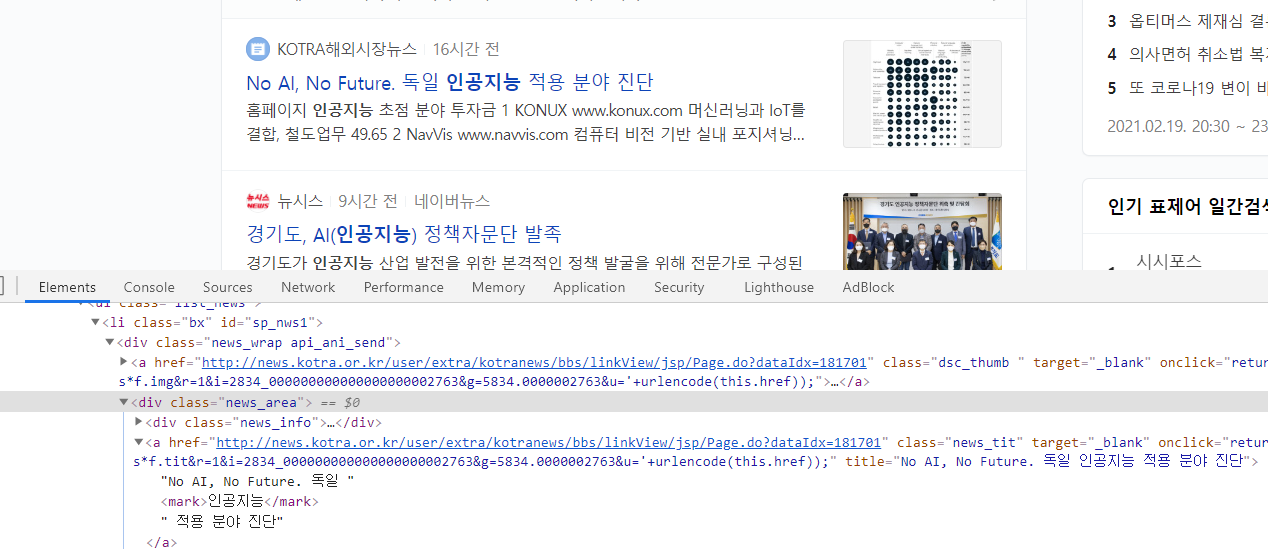

## 2-1. find_all 실습

In [4]:
url = 'https://search.naver.com/search.naver?&where=news&query=은행%20인공지능&start=1&refresh_start=0'

r = requests.get(url)
soup = BeautifulSoup(r.text, "html.parser")
trs = soup.body.find_all('div', attrs={'class':'news_area'})   # body에서 <div>태그 중 attribute 검색해서 class가 news_area 다 가져와라!!!

trs

[<div class="news_area"> <div class="news_info"> <div class="api_save_group _keep_wrap"> <a aria-pressed="false" class="btn_save _keep_trigger" data-url="http://www.sisajournal.com/news/articleView.html?idxno=222381" href="#" onclick="tCR('a=nws*e.kep&amp;r=1&amp;i=8817cacd_000000000000000000027801&amp;u=javascript'); return false;" role="button"><i class="spnew ico_save">문서 저장하기</i></a> <div class="api_ly_save _keep_save_layer"> <a class="spnew_af item item_save _keep_save" data-cr-off="a=nws*e.kepoff&amp;r=1&amp;i=8817cacd_000000000000000000027801&amp;u=javascript" data-cr-on="a=nws*e.kepon&amp;r=1&amp;i=8817cacd_000000000000000000027801&amp;u=javascript" href="#" role="button">Keep에 저장</a> <a class="spnew_af item item_quick" href="https://keep.naver.com/" onclick="return goOtherCR(this,'a=nws*e.kephome&amp;r=1&amp;i=8817cacd_000000000000000000027801&amp;u='+urlencode(this.href));" target="_blank">Keep 바로가기</a> </div></div><div class="info_group"> <a class="info press" href="http://w

### > 위에서 생성한 목표한 페이지까지 크롤링해서 제목들만 함 모아보자!
* 음 근데 지저분해서 보기 힘드네 ...

In [ ]:
news_list = [ ] 
for i in range(10) :
  r = requests.get(list_naver_news[i])
  soup = BeautifulSoup(r.text, 'html.parser')
  trs = soup.body.find_all('div', attrs={'class':'news_area'})  # body에서 <div>태그 중 attribute 검색해서 class가 news_area 다 가져와라!!!
  news_list.append(trs)

news_list

[[<div class="news_area"> <div class="news_info"> <div class="info_group"> <a class="info press" href="http://news.koreanbar.or.kr" onclick="return goOtherCR(this, 'a=nws*f.prof&amp;r=1&amp;i=88155e83_000000000000000000011721&amp;g=5330.0000011721&amp;u='+urlencode(this.href));" target="_blank"><span class="thumb_box"></span>대한변협신문</a><span class="info">1시간 전</span> </div></div><a class="news_tit" href="http://news.koreanbar.or.kr/news/articleView.html?idxno=22854" onclick="return goOtherCR(this, 'a=nws*f.tit&amp;r=1&amp;i=88155e83_000000000000000000011721&amp;g=5330.0000011721&amp;u='+urlencode(this.href));" target="_blank" title="[여풍당당 여변]인공지능과 비대면 면접">[여풍당당 여변]<mark>인공지능</mark>과 비대면 면접</a> <div class="news_dsc"> <div class="dsc_wrap"> <a class="api_txt_lines dsc_txt_wrap" href="http://news.koreanbar.or.kr/news/articleView.html?idxno=22854" onclick="return goOtherCR(this, 'a=nws*f.body&amp;r=1&amp;i=88155e83_000000000000000000011721&amp;g=5330.0000011721&amp;u='+urlencode(this.href))

### > 크롤링한 값들 중 샘플을 뽑아 HTML 뷰어로 Beautify해서 구조 파악하자!
* span class -> info에 시간
* a class -> news_tit에 하이퍼링크와 제목 있음
* a class -> api_txt_lines dsc txt wrap에 요약자료


In [ ]:
news_list[0][0]

<div class="news_area"> <div class="news_info"> <div class="info_group"> <a class="info press" href="http://news.koreanbar.or.kr" onclick="return goOtherCR(this, 'a=nws*f.prof&amp;r=1&amp;i=88155e83_000000000000000000011721&amp;g=5330.0000011721&amp;u='+urlencode(this.href));" target="_blank"><span class="thumb_box"></span>대한변협신문</a><span class="info">1시간 전</span> </div></div><a class="news_tit" href="http://news.koreanbar.or.kr/news/articleView.html?idxno=22854" onclick="return goOtherCR(this, 'a=nws*f.tit&amp;r=1&amp;i=88155e83_000000000000000000011721&amp;g=5330.0000011721&amp;u='+urlencode(this.href));" target="_blank" title="[여풍당당 여변]인공지능과 비대면 면접">[여풍당당 여변]<mark>인공지능</mark>과 비대면 면접</a> <div class="news_dsc"> <div class="dsc_wrap"> <a class="api_txt_lines dsc_txt_wrap" href="http://news.koreanbar.or.kr/news/articleView.html?idxno=22854" onclick="return goOtherCR(this, 'a=nws*f.body&amp;r=1&amp;i=88155e83_000000000000000000011721&amp;g=5330.0000011721&amp;u='+urlencode(this.href));"

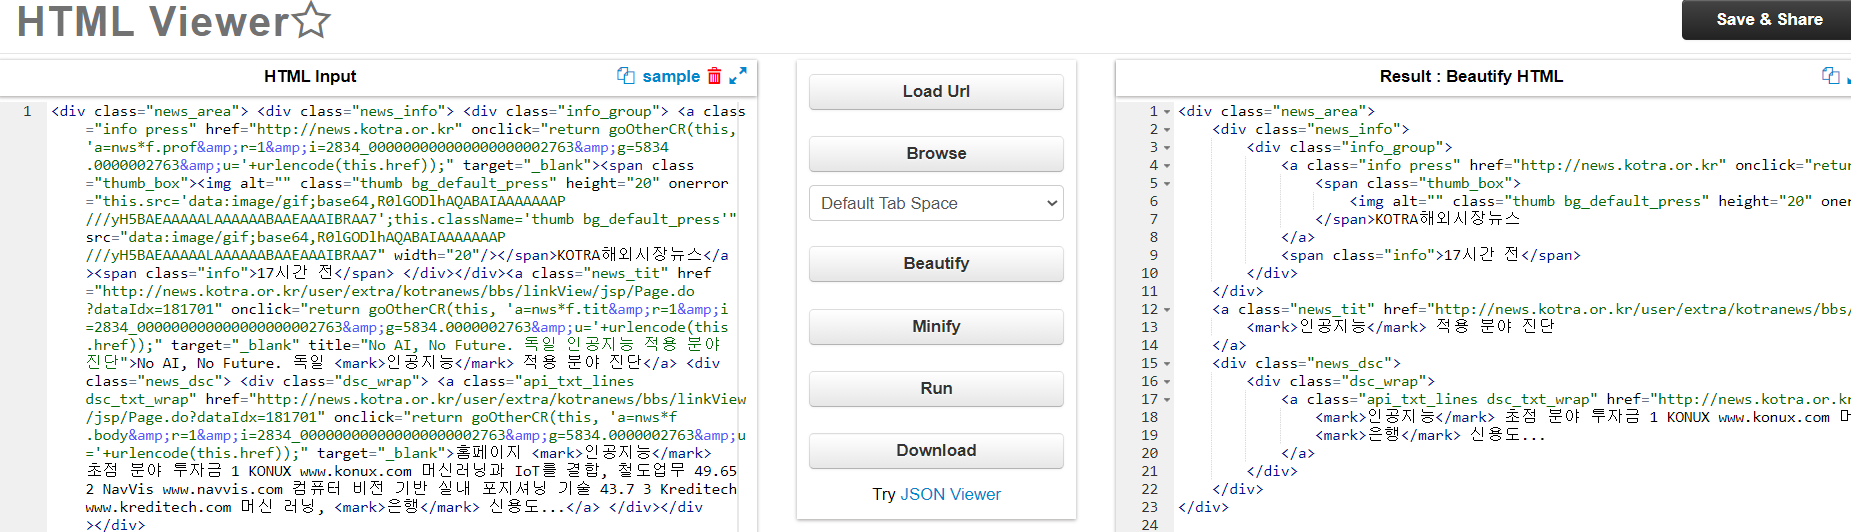

### > find_all로 class를 지정해서 뽑아 각각 리스트로 만들어볼까

In [ ]:
news_time = [ ] 
news_title = [ ]
news_info = [ ]

for i in range(10) :
  r = requests.get(list_naver_news[i])
  soup = BeautifulSoup(r.text, 'html.parser')

  time = soup.body.find_all('span', attrs={'class':'info'}) 
  news_time.append(time)

  title = soup.body.find_all('a', attrs={'class':'news_tit'}) 
  news_title.append(title)

  info = soup.body.find_all('a', attrs={'class':'api_txt_lines dsc_txt_wrap'})
  news_info.append(info)

#### time 요소 뽑기

In [ ]:
news_time[0]

[<span class="info">2시간 전</span>,
 <span class="info">3일 전</span>,
 <span class="info">3일 전</span>,
 <span class="info">1일 전</span>,
 <span class="info">8시간 전</span>,
 <span class="info">7일 전</span>,
 <span class="info">2일 전</span>,
 <span class="info">1일 전</span>,
 <span class="info">2일 전</span>,
 <span class="info">1일 전</span>]

In [ ]:
news_time[0][0]

<span class="info">2시간 전</span>

In [ ]:
news_time[0][0].text

'2시간 전'

#### 제목 요소 : 텍스트 및 하이퍼링크

In [ ]:
news_title[0][0]

<a class="news_tit" href="http://news.koreanbar.or.kr/news/articleView.html?idxno=22854" onclick="return goOtherCR(this, 'a=nws*f.tit&amp;r=1&amp;i=88155e83_000000000000000000011721&amp;g=5330.0000011721&amp;u='+urlencode(this.href));" target="_blank" title="[여풍당당 여변]인공지능과 비대면 면접">[여풍당당 여변]<mark>인공지능</mark>과 비대면 면접</a>

In [ ]:
news_title[0][0].text

'[여풍당당 여변]인공지능과 비대면 면접'

In [ ]:
txt = str(news_title[0][0])

In [ ]:
txt.split('<a class="news_tit" href=')[1]

'"http://news.koreanbar.or.kr/news/articleView.html?idxno=22854" onclick="return goOtherCR(this, \'a=nws*f.tit&amp;r=1&amp;i=88155e83_000000000000000000011721&amp;g=5330.0000011721&amp;u=\'+urlencode(this.href));" target="_blank" title="[여풍당당 여변]인공지능과 비대면 면접">[여풍당당 여변]<mark>인공지능</mark>과 비대면 면접</a>'

In [ ]:
txt.split('<a class="news_tit" href=')[1].split('"')[1]

'http://news.koreanbar.or.kr/news/articleView.html?idxno=22854'

#### 기사 요약 텍스트

In [ ]:
news_info[0][0].text

"'인공지능 역량검사'는 본래 2018년 금융권 채용 비리 문제를 계기로 등장했으며 최근 코로나19로 '비대면 전형'이 늘어나면서 더 큰 주목을 받고 있다. 이미 포스코, 국민은행, 한미약품, 연세세브란스병원 등 약 1000여 곳이..."

#### 중요한 건 각 요소들을 모아서 각각 리스트로 만들기

In [ ]:
times = [ ]
titles = [ ]
links = [ ]
infos = [ ]

for i in range(10) :
    for j in range(10) : 
        times.append(news_time[i][j].text)
        titles.append(news_title[i][j].text)
        links.append( str(news_title[i][j]).split('<a class="news_tit" href=')[1].split('"')[1] )
        infos.append(news_info[i][j].text)


In [ ]:
import pandas as pd

df = pd.DataFrame({ 'time' : times, 'title' : titles, 'info' : infos, 'link' : links })
df.to_excel('크롤링 테스트.xlsx')

# 그럼 한방에 해보자!!!

In [ ]:
import re

import requests
from bs4 import BeautifulSoup

In [ ]:
key1 = '은행'
key2 = '인공지능'
page = [ i for i in range(1, 102, 10)]

In [5]:
list_naver_news = [ ]
for p in page :
  url_news = 'https://search.naver.com/search.naver?&where=news&query='+key1+'%20'+key2+'&start='+str(p)+'&refresh_start=0'
  list_naver_news.append(url_news)

In [6]:
news_time = [ ] 
news_title = [ ]
news_info = [ ]

for i in range(10) :
  r = requests.get(list_naver_news[i])
  soup = BeautifulSoup(r.text, 'html.parser')

  time = soup.body.find_all('span', attrs={'class':'info'}) 
  news_time.append(time)

  title = soup.body.find_all('a', attrs={'class':'news_tit'}) 
  news_title.append(title)

  info = soup.body.find_all('a', attrs={'class':'api_txt_lines dsc_txt_wrap'})
  news_info.append(info)

In [7]:
times = [ ]
titles = [ ]
links = [ ]
infos = [ ]

for i in range(10) :
    for j in range(10) : 
        times.append(news_time[i][j].text)
        titles.append(news_title[i][j].text)
        links.append( str(news_title[i][j]).split('<a class="news_tit" href=')[1].split('"')[1] )
        infos.append(news_info[i][j].text)


In [8]:
import pandas as pd

df = pd.DataFrame({ 'time' : times, 'title' : titles, 'info' : infos, 'link' : links })
df.to_excel('크롤링 테스트.xlsx')